In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
   -O /tmp/rockpaperscissors.zip

--2020-07-15 11:01:40--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.77MB/s    in 42s     

2020-07-15 11:02:23 (7.33 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_path = '/tmp/rockpaperscissors/rps-cv-images'

In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                    validation_split=0.2,
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=False,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

train_generator = datagen.flow_from_directory(
        base_path,  
        target_size=(150, 150),  
        batch_size=4,
        subset="training",
        class_mode='categorical')

validation_generator = datagen.flow_from_directory(
        base_path,  
        target_size=(150, 150),  
        batch_size=4,
        subset="validation",
        class_mode=None)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [42]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

history = model.fit(
          train_generator,
          steps_per_epoch=100, 
          epochs=10,
          validation_data=validation_generator,
          validation_steps=30, 
          verbose=2,
          callbacks=[callback])

Epoch 1/10
100/100 - 24s - loss: 1.0282 - accuracy: 0.4850 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
100/100 - 24s - loss: 0.5966 - accuracy: 0.8025 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/10
100/100 - 24s - loss: 0.3527 - accuracy: 0.8772 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/10
100/100 - 24s - loss: 0.2793 - accuracy: 0.8947 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/10
100/100 - 24s - loss: 0.2592 - accuracy: 0.9175 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/10
100/100 - 27s - loss: 0.2292 - accuracy: 0.9225 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/10
100/100 - 24s - loss: 0.2043 - accuracy: 0.9325 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 8/10
100/100 - 24s - loss: 0.1700 - accuracy: 0.9425 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 9/10
100/100 - 24s - loss: 0.1783 - accuracy: 0.9350 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 10/10
100/100

Saving batu.jpg to batu (1).jpg
rock


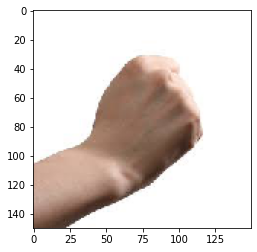

In [44]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  if classes[0][0] == 1:
    print("paper")
  elif classes[0][1] == 1:
    print("rock")
  else:
    print("scissors")